In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt
from dynamics_cart_pole import cart_pole
import pygame as pg
from scipy.optimize import minimize 
from pygame import gfxdraw
import cma

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [36]:
# Your code here
state_num=4
#action_num=100
order=7
d=(order+1)**state_num
#d_a=d*action_num
f_min=-10
f_max=10

def scale(state_):
    a_ = np.array([(state_[0]+2*np.pi)/(4*np.pi),(state_[1]+np.pi)/(2*np.pi),(state_[2]+2*np.pi)/(4*np.pi) ,(state_[3]+np.pi)/(2*np.pi) ])
    return a_

def create_c(k_,n_):#number of states, order
    c_ = [[] for j in range(k_)]
    for i in range(k_):
        for j in range(int(np.power(n_ + 1,i))):
            for p in range(n_ + 1):
                for r in range(int(np.power(n_ + 1,k_- i - 1))):
                    c_[i].append(p)
    c_ = np.array(c_,dtype = np.int8)
    return c_
c=create_c(state_num,order)

def create_x_i(s_): #for v_hat
    state = scale(s_)
    x_i_=np.cos(np.pi*(np.matmul(state,c)))
    return x_i_


def policy(st,theta_mu,theta_sigma):
    mu=np.matmul(theta_mu,create_x_i(st))
    sigma=np.exp(np.matmul(theta_sigma,create_x_i(st)))
    action=np.random.normal(mu,sigma,1)
    action=np.clip(action,f_min,f_max)
    return action


In [51]:
def reward(angle,x_in):
    return np.exp(0.5*((angle-(np.pi))**2+0.1*(x_in**2)))
global step_per_e
step_per_e=[]
def saving(cost_in):
    global step_per_e
    step_per_e=np.append(step_per_e,[cost_in])


def new(theta):
    theta_mu = theta[0:d]
    theta_sigma=theta[d:]
    episode = 0
    step = np.empty(0)
    #state_list = []
    #step_per_episode = []
    #reward_sum = []
    cart = cart_pole()
    t = 0
    action = np.empty(0)
    s = np.zeros((1,4))# states
    s[0] = [0,0,0,0]# 
    b=1
    total_cost=0
    while True :
        theta=np.append(theta_mu,theta_sigma)
        real_action=policy(s[t],theta_mu,theta_sigma)
        next_x,next_v,next_a_v, angle = cart.move(s[t][0], s[t][1],s[t][2], s[t][3], real_action)
        #print(real_action)
        s = np.append(s,[[next_x,next_v,next_a_v,angle]],axis=0)
        #print([next_x,next_v,next_a_v,angle],end=" ")
        cost_=reward(angle,next_x)
        total_cost+=cost_
        t += 1 
        if t>200:
            saving(t-1)
            break
        if (3/4)*np.pi<angle<=(5/4)*np.pi and -(1/4)*np.pi<x<(1/4)*np.pi:
                counter+=1
        else:
            counter=0
        if counter==20:
            saving(t-1)
            break
    #step_per_episode.append(t)
    #state_list.append(s)
    #reward_sum.append(-t)
    #return state_list,step_per_episode , reward_sum
    return total_cost ,s#, state_list


In [52]:
total_cost ,s=new(2*d*[0])
print(total_cost)

15480.613982095463


In [53]:
iteration_num=50
run_number=1
def eval(theta=2*d*[0]):
    sigma0=0.25
    costs=np.empty((1,iteration_num))
    t=0
    global step_per_e
    step_per_e=[]
    for i in range(run_number):
        #theta=2*d*[0]
        es = cma.CMAEvolutionStrategy(theta, sigma0).optimize(new,iterations=iteration_num)
        res=es.result
        theta=res[0]
        #sigma0=np.average(res[-2])
        file=open("outcmaes/fit.dat")
        results=[]
        for line in file:
            results += [line.split()]
        results.pop(0)
        res1=np.array(results,dtype=float)
        costs = np.append(costs,[res1[:,5]],axis=0)
        t+=1
    return costs , es,theta
costs_, es, theta=eval()



(15_w,31)-aCMA-ES (mu_w=8.9,w_1=20%) in dimension 8192 (seed=437468, Fri Apr  2 11:57:17 2021)


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (13803.679607226439, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-7.79554022e-02, -1.51529938e+00,  4.29564437e+00,
         2.27706636e-01],
       [-2.19753957e-01, -1.30732637e+00,  2.54137327e+00,
         5.78595855e-01],
       [-3.01172400e-01, -3.31737209e-01, -1.56343365e+00,
         6.26452370e-01],
       [-2.89917304e-01,  5.81687959e-01, -5.34777677e+00,
         2.80187861e-01],
       [-1.52392693e-01,  1.92201402e+00, -6.28318531e+00,
         5.78616137e+00],
       [-4.74137772e-02,  2.72331718e-01, -6.05460924e-01,
         5.45512995e+00],
       [-4.39556565e-02, -2.16556232e-01,  2.53609465e+00,
         5.55105143e+00],
       [-1.52780475e-01, -2.03959888e+00,  6.28318531e+00,
         6.10285422e+00],
       [-4.25424280e-01, -3.12827

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     31 8.047158802280446e+03 1.0e+00 2.50e-01  2e-01  2e-01 0:28.3


/home/csrobot/.local/lib/python3.6/site-packages/cma/utilities/utils.py:347: UserWarning: function_values is not a list of scalars,
                        the first element equals (10118.361241436935, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.50256120e-02,  2.95240832e-01, -8.41628457e-01,
         6.23921924e+00],
       [-3.60309685e-02, -1.29166965e+00,  3.92252799e+00,
         1.17863599e-01],
       [-2.26220986e-01, -2.37731376e+00,  5.92797974e+00,
         6.46241526e-01],
       [-3.80950794e-01, -8.13425617e-01,  6.01273323e-01,
         9.59075399e-01],
       [-3.93182574e-01,  6.20063738e-01, -4.36929501e+00,
         7.77836284e-01],
       [-2.37628317e-01,  2.52578421e+00, -6.28318531e+00,
         2.80868253e-02],
       [-7.09829956e-02,  8.03610955e-01, -6.72054326e-01,
         5.95709007e+00],
       [-7.53946558e-02, -8.98842120e-01,  5.01519414e+00,
         6.17619357e+00],
       [-8.49218516e-02,  7.29825

    2     62 7.567433743199105e+03 1.0e+00 2.49e-01  2e-01  2e-01 0:56.3
    3     93 8.807728336265538e+03 1.0e+00 2.49e-01  2e-01  2e-01 1:24.3
    4    124 7.165135442967985e+03 1.0e+00 2.49e-01  2e-01  2e-01 1:52.7
    5    155 7.269099931941776e+03 1.0e+00 2.48e-01  2e-01  2e-01 2:21.1
    6    186 7.127978096552631e+03 1.0e+00 2.48e-01  2e-01  2e-01 2:49.5
    7    217 8.359308393386502e+03 1.0e+00 2.48e-01  2e-01  2e-01 3:17.7
    8    248 6.210923139913306e+03 1.0e+00 2.48e-01  2e-01  2e-01 3:45.8
    9    279 7.660722075893237e+03 1.0e+00 2.47e-01  2e-01  2e-01 4:14.4
   10    310 7.221484543470536e+03 1.0e+00 2.47e-01  2e-01  2e-01 4:42.5
   11    341 6.312929938544860e+03 1.0e+00 2.47e-01  2e-01  2e-01 5:10.5
   12    372 6.054031867527371e+03 1.0e+00 2.47e-01  2e-01  2e-01 5:38.5
   13    403 7.163420993693278e+03 1.0e+00 2.46e-01  2e-01  2e-01 6:06.7
   14    434 5.826186711235415e+03 1.0e+00 2.46e-01  2e-01  2e-01 6:34.8
   15    465 7.134629211400471e+03 1.0e+00 2.46e-01

In [61]:
steps=np.reshape(step_per_e, (run_number*iteration_num, 31))
steps=np.min(steps, axis=1)
steps=np.reshape(steps, (run_number, iteration_num))
costs_list = np.delete(costs_, 0, axis=0)

AttributeError: 'numpy.ndarray' object has no attribute 'pop'

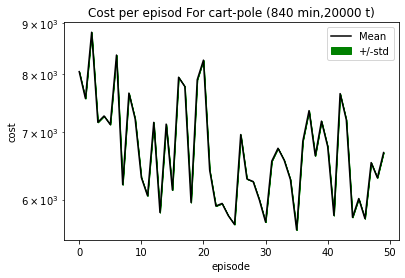

In [55]:
cost_std=np.std(costs_list, axis=0)
cost_ave=np.average(costs_list, axis=0)
x = np.arange(iteration_num)
plt.plot(x,cost_ave,color="black",label='Mean')
plt.fill_between(x,cost_ave+cost_std,cost_ave-cost_std,color="g",label='+/-std')
plt.xlabel("episode")
plt.ylabel("cost")
plt.yscale("log")
plt.title("Cost per episod For cart-pole (840 min,20000 t)")
plt.legend()

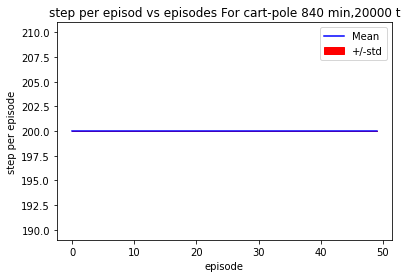

In [56]:
steps_std=np.std(steps, axis=0)
steps_ave=np.mean(steps, axis=0)
#steps_med=np.median(steps, axis=0)
x_ = np.arange(iteration_num)
plt.plot(x_,steps_ave,color="blue",label='Mean')
plt.fill_between(x_,steps_ave+steps_std,steps_ave-steps_std,color="red",label='+/-std')
plt.xlabel("episode")
plt.ylabel("step per episode")
#plt.yscale("log")
plt.title("step per episod vs episodes For cart-pole 840 min,20000 t")
plt.legend()

In [57]:
_,s=new(theta)

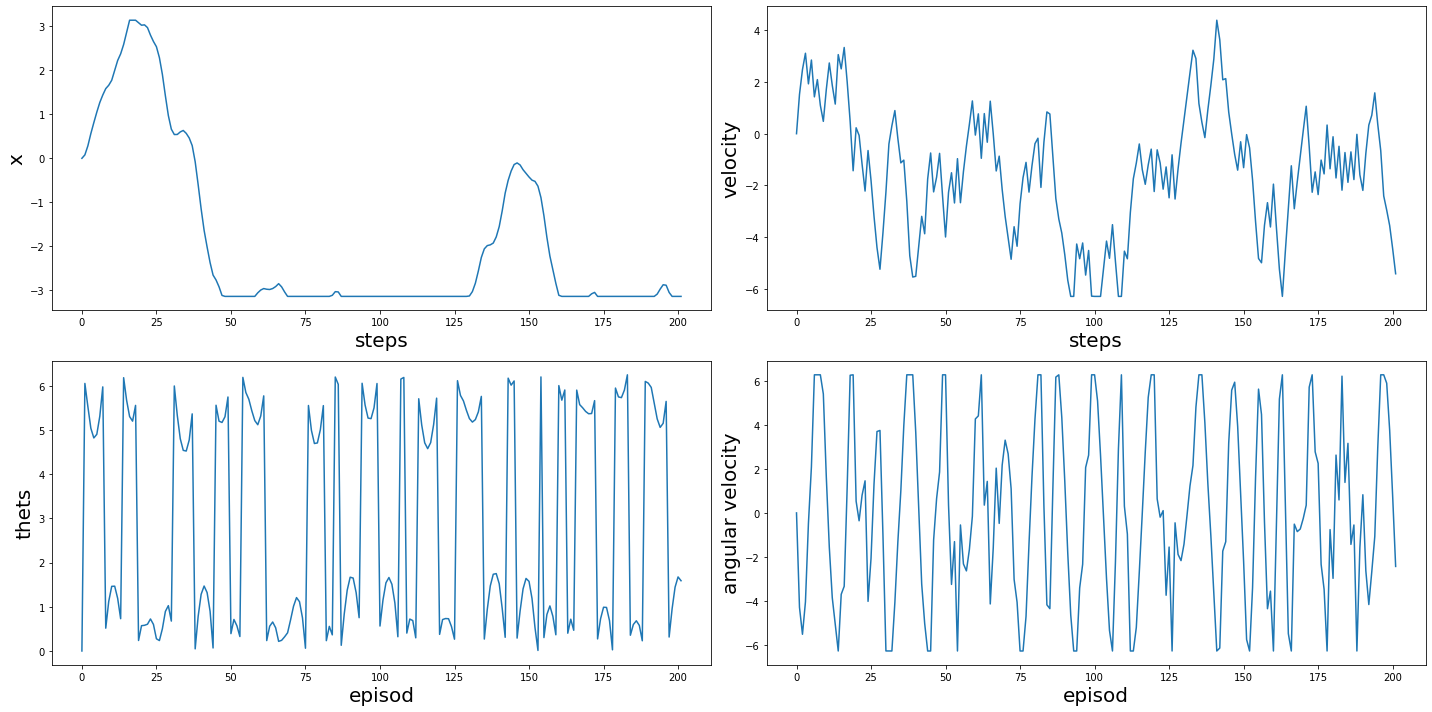

In [58]:
states=np.array(s)


fig=plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.xlabel("steps",fontsize=20)
plt.ylabel("x",fontsize=20)
plt.plot(states[:,0])

plt.subplot(2,2,2)
plt.xlabel("steps",fontsize=20)
plt.ylabel("velocity",fontsize=20)
plt.plot(states[:,1])

plt.subplot(2,2,4)
plt.xlabel("episod",fontsize=20)
plt.ylabel("angular velocity",fontsize=20)
plt.plot(states[:,2])

plt.subplot(2,2,3)
plt.xlabel("episod",fontsize=20)
plt.ylabel("thets",fontsize=20)
plt.plot(states[:,3])
#plt.legend(fontsize=20)
fig.tight_layout()